In [1]:
# Importing necessary libraries
# Supressing Warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)

## Data reading

In [2]:
house=pd.read_csv("train.csv")
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
#Performing basic operations
print(house.info())
print(house.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

1. There are 1460 Rows and 81 columns in our dataset
2. SalePrice is our target variable
3. Using Lasso and Ridge regression we will regularize the model

In [4]:
## Statistical analysis
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [5]:
## Checking Null values present in each columns
round(100*(house.isnull().sum()/len(house.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

We can see that there are some columns with more than 80% null values and we have to deal with missing values during data preprocessing

In [6]:
# Dropping ID Column as it is not necessary
house= house.drop('Id',axis='columns')

## Numerical Variables

In [7]:
# list of numerical variables
numerical_features = [feature for feature in house.columns if house[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
house[numerical_features].head()

Number of numerical variables:  37


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [8]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [9]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

house.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

Text(0.5, 1.0, 'House Price vs YearSold')

From the graph above we can see that the price of house decreases as year increases which is an obious discrepancy

In [10]:

## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(house[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [11]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [12]:
house[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

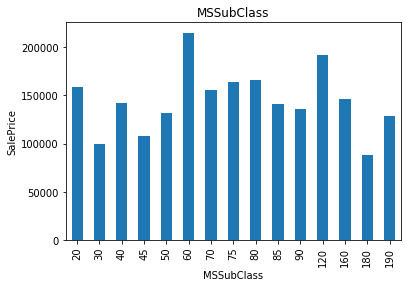

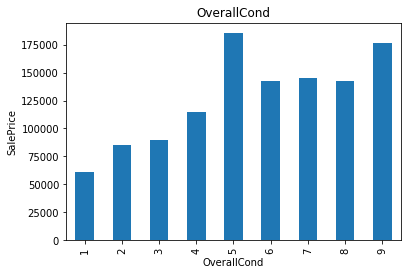

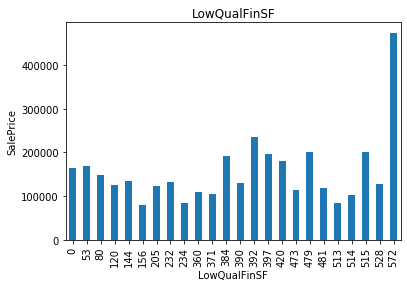

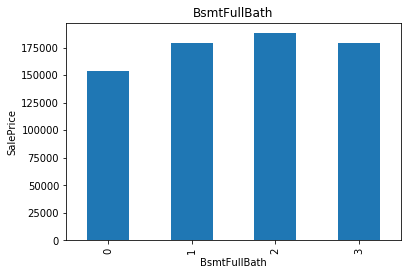

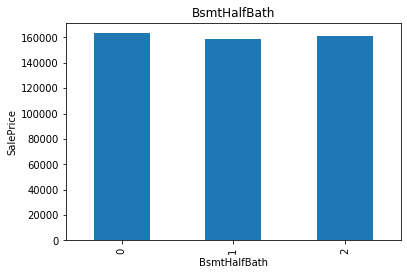

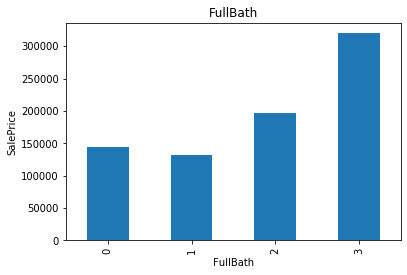

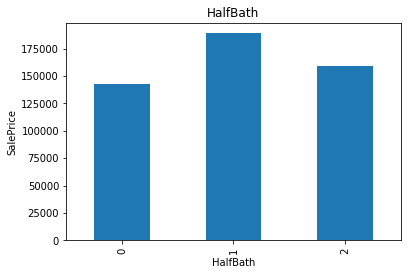

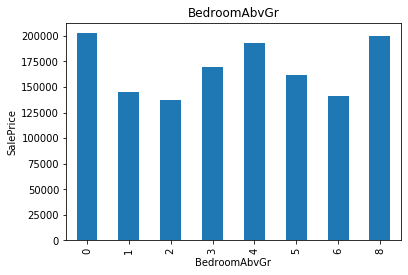

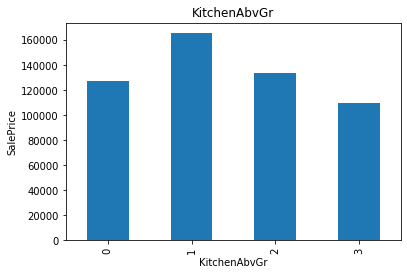

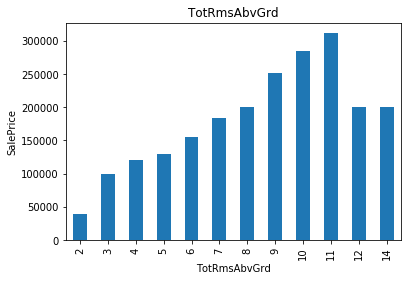

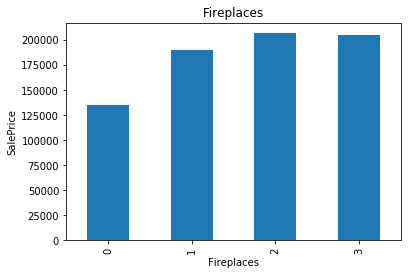

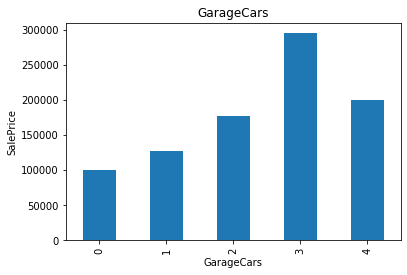

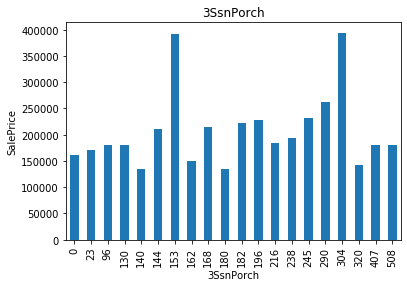

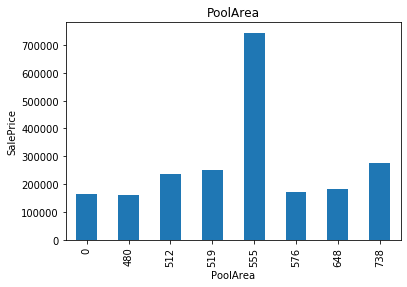

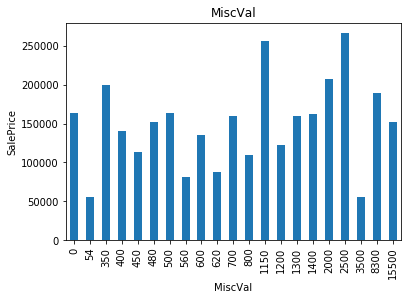

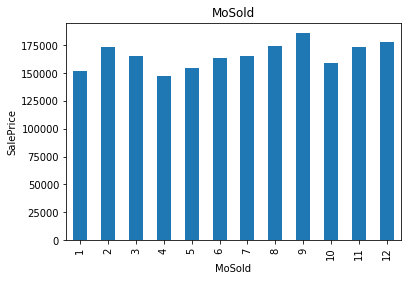

In [13]:
## Plotting Discrete variables against Sale PRice

for feature in discrete_feature:
    data=house.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

1. As OverallQual increases from 1 to 10, saleprice also increases
2. Overallcond is also directly proprtional to saleprice
3. FullBath is also directly proprtional to saleprice, increases from 0 to 3
4. Saleprice of the house increases as TotRmsAbcGrd increases from 2 to 11
5. Saleprice of the house increases as Fireplaces increases from 0 to 2 and remains constant till 3
6. Saleprice of the house increases as Garagecars increases from 0 to 3 and then drops
7. Saleprice is maximum if PoolArea is 555

In [14]:
## Getting continous variables
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


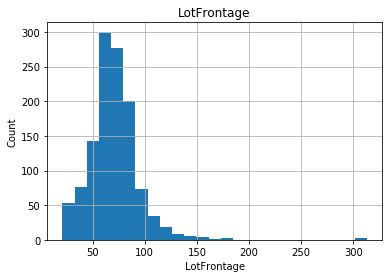

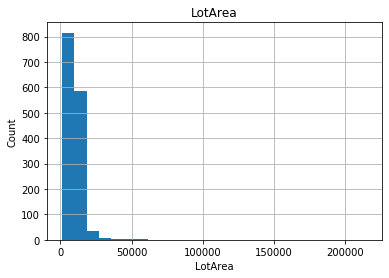

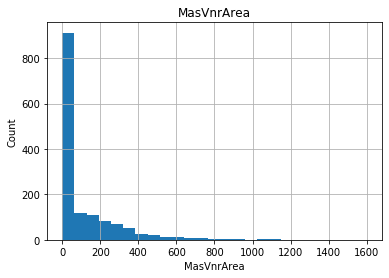

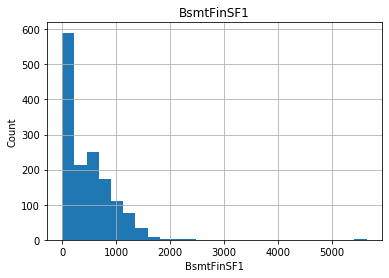

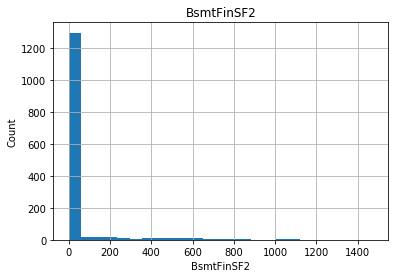

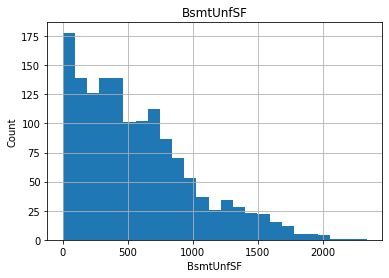

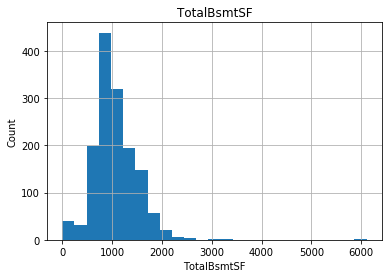

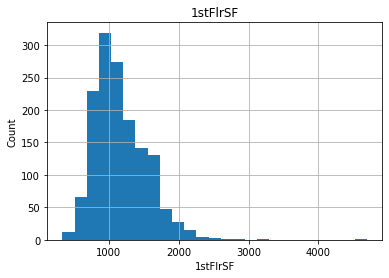

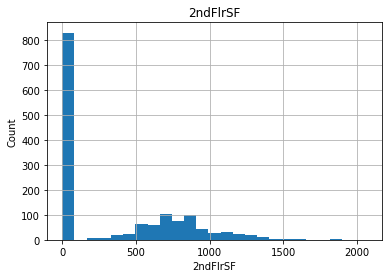

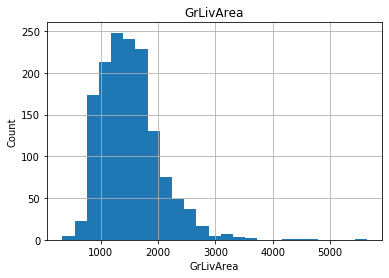

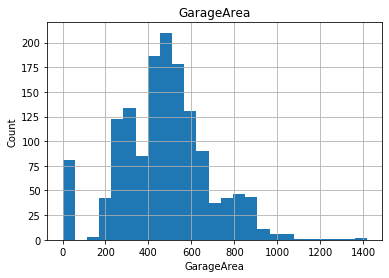

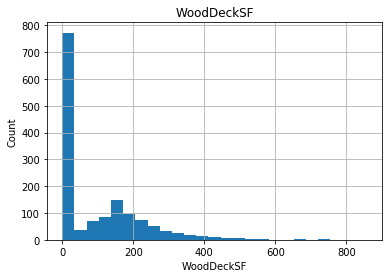

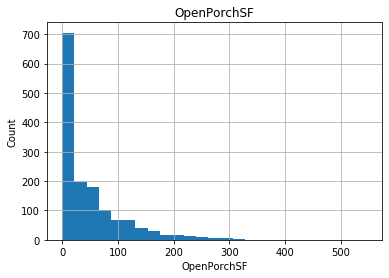

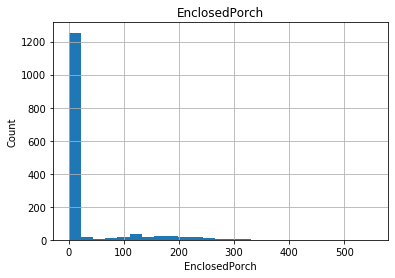

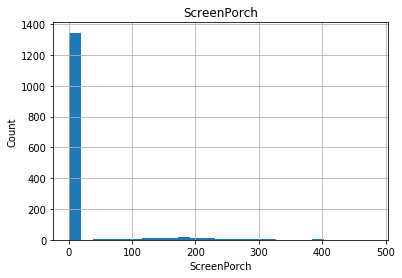

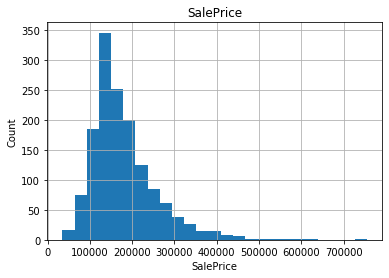

In [15]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=house.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

We can observe that target variable is skewed and hence we need to transform the variable 

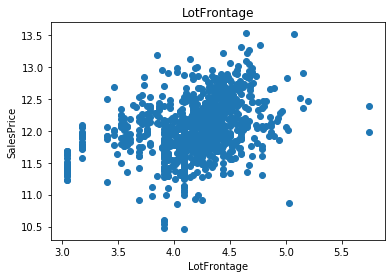

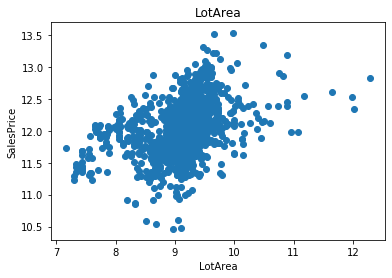

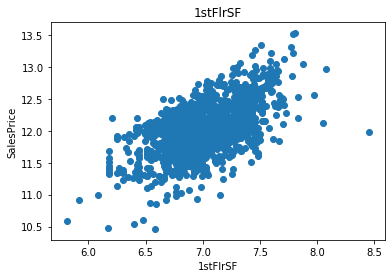

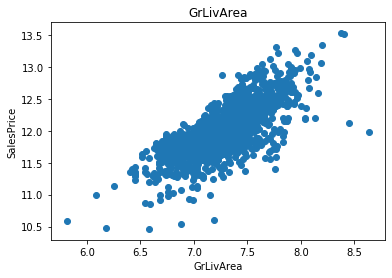

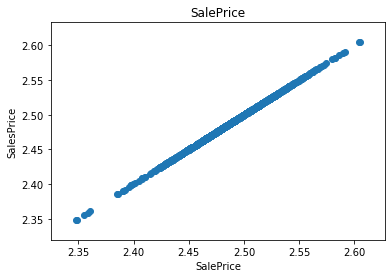

In [16]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=house.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

1. GrLivArea and 1stFloorSf has linear relationship with saleprice
2. LotArea and LotFrontage does not have linear realtionship with saleprice

## Outlier Detection

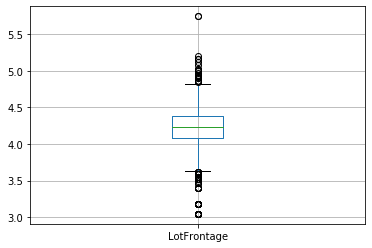

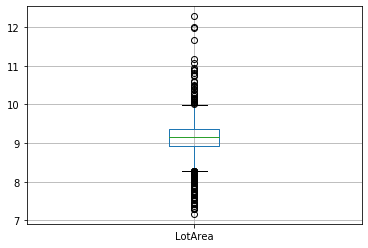

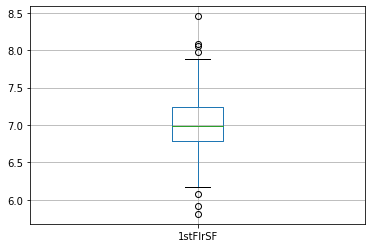

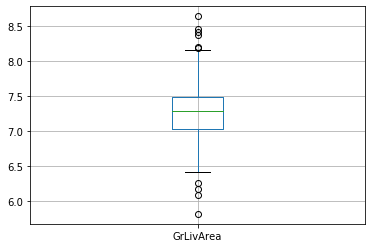

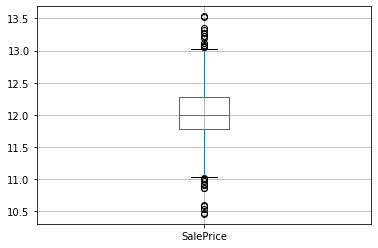

In [17]:
for feature in continuous_feature:
    data=house.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
#        plt.ylabel(feature)
#        plt.title(feature)
        plt.show()

Outliers are present in each of the continous variable and we have to deal with them

## Categorical Features

In [18]:
categorical_features=[feature for feature in house.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [19]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(house[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

### Relationship between Categorical feature and sale price

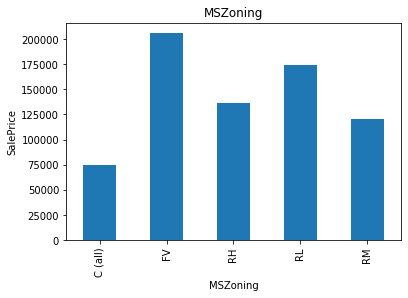

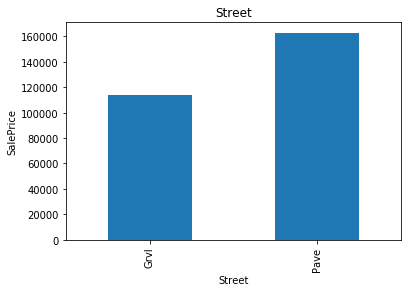

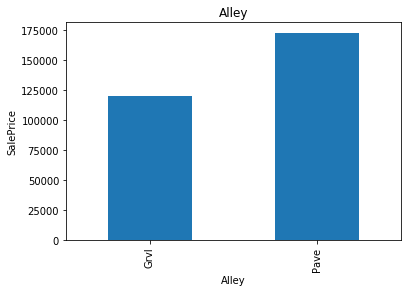

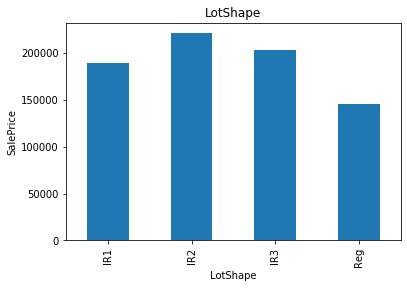

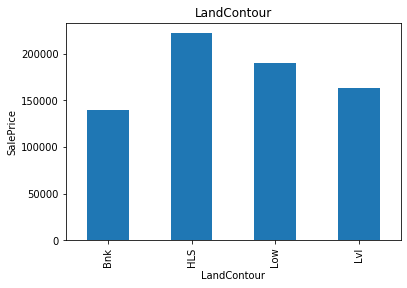

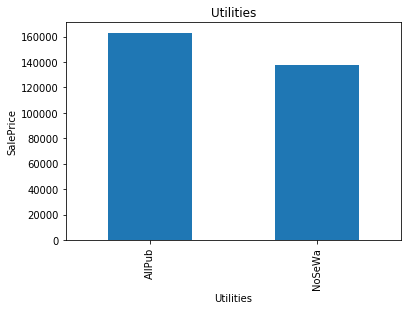

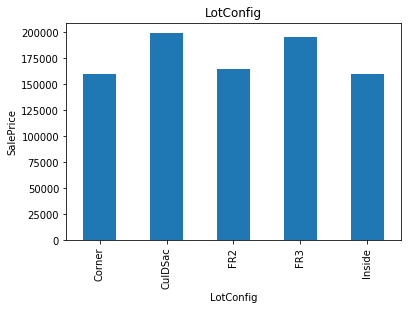

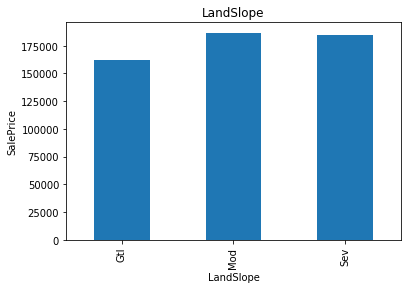

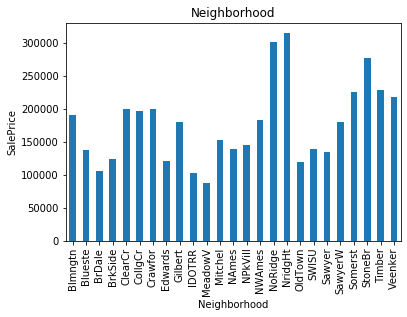

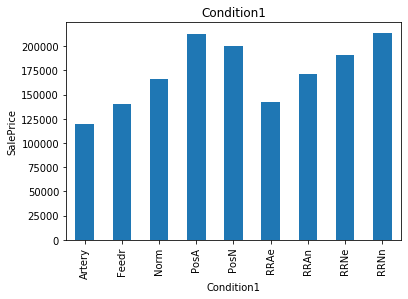

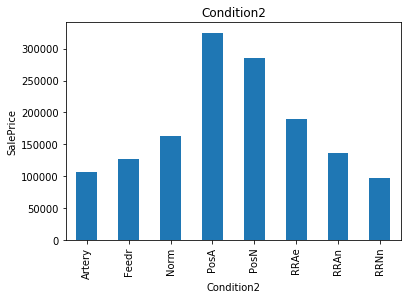

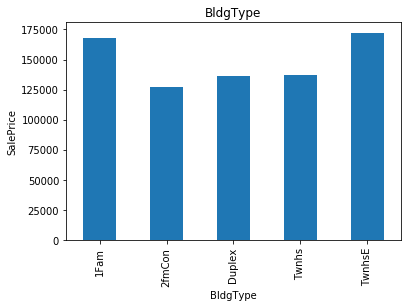

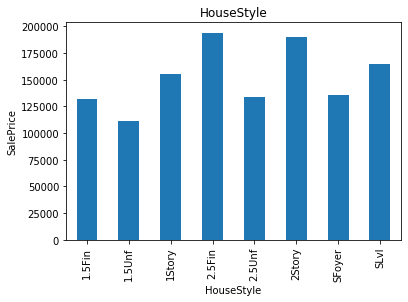

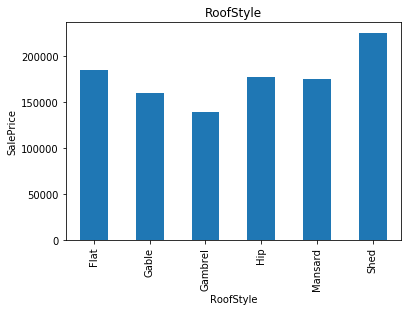

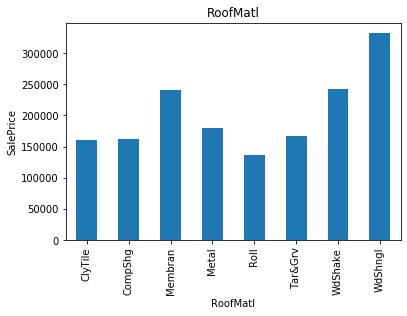

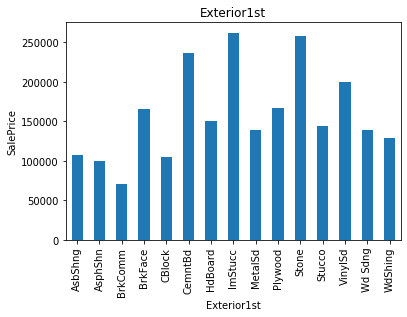

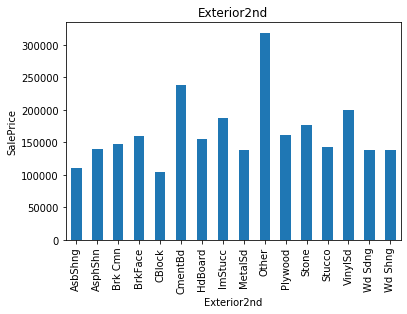

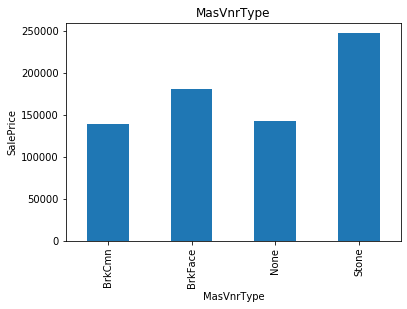

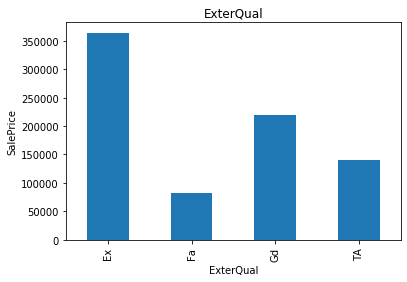

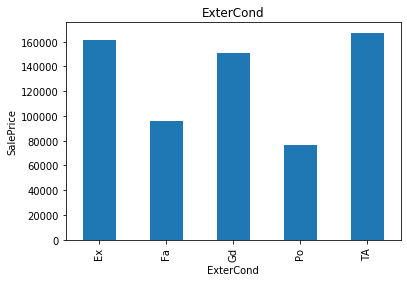

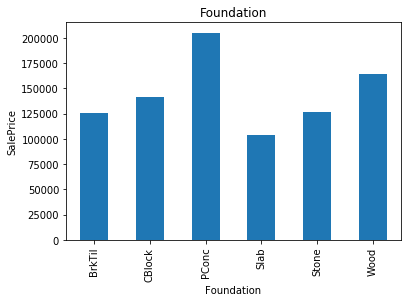

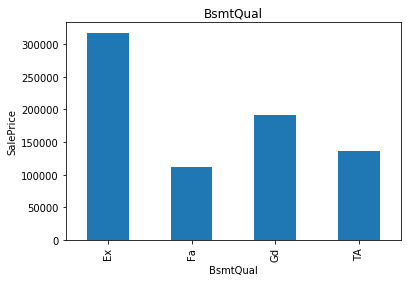

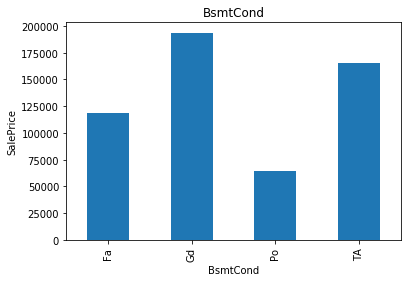

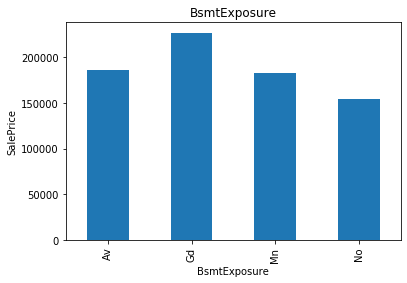

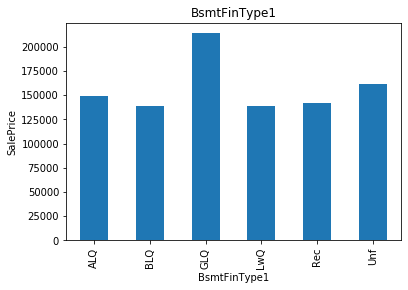

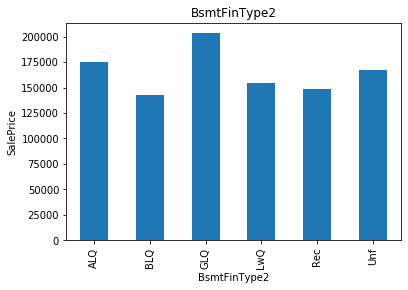

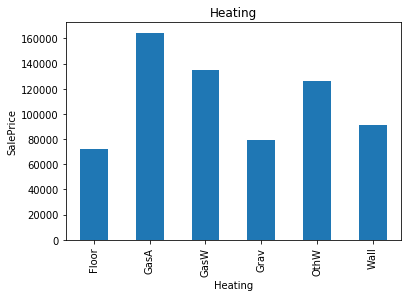

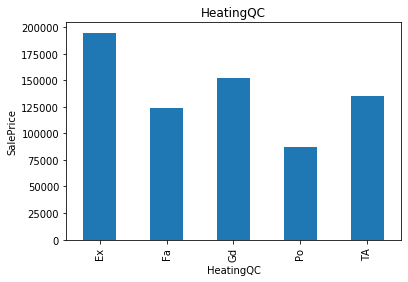

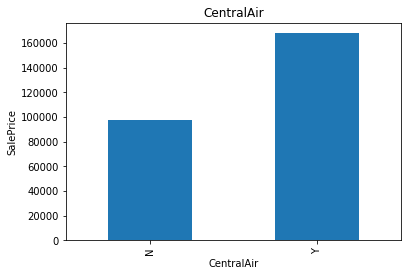

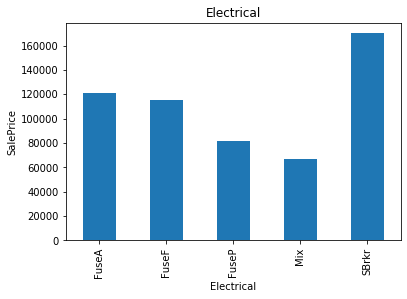

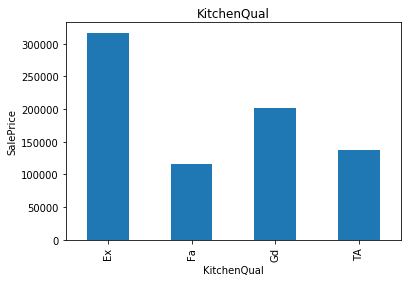

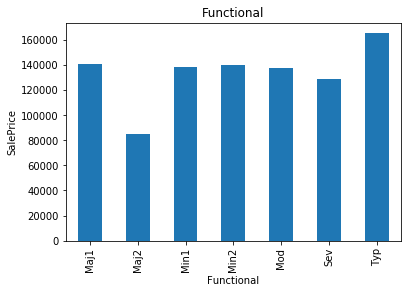

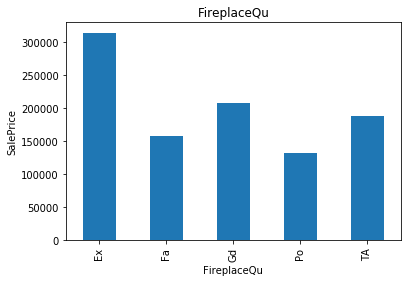

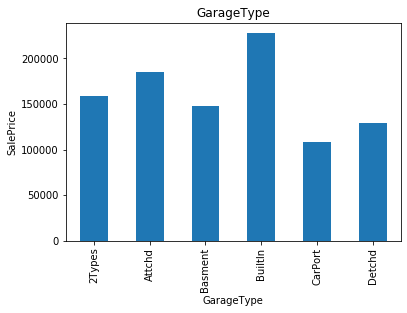

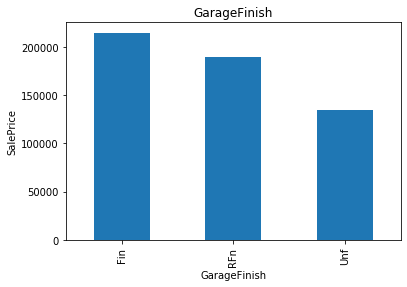

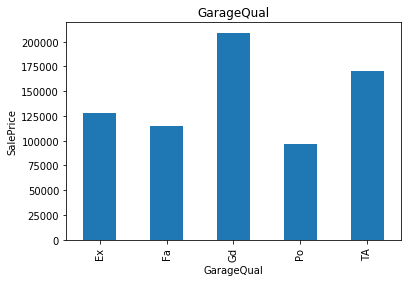

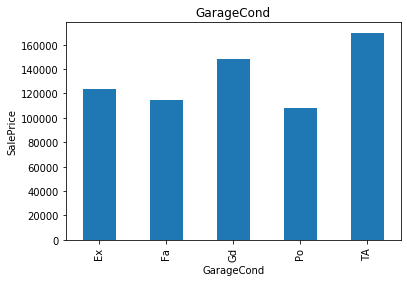

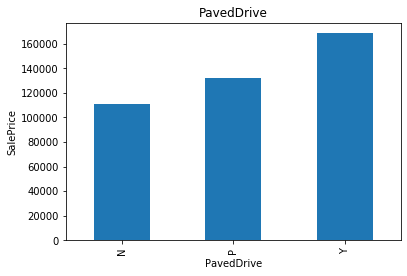

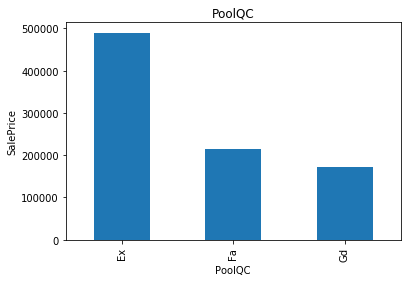

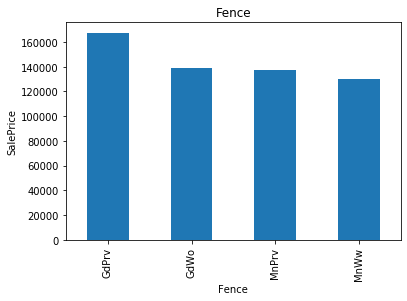

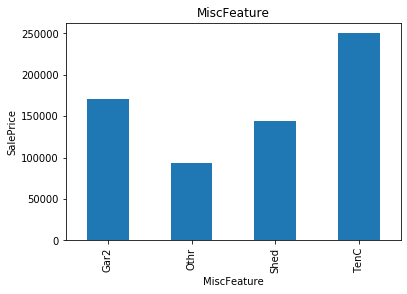

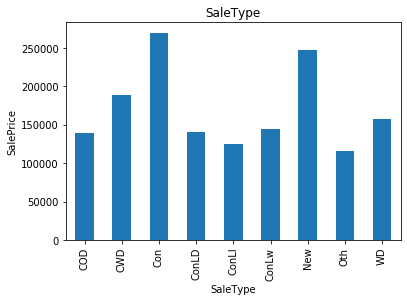

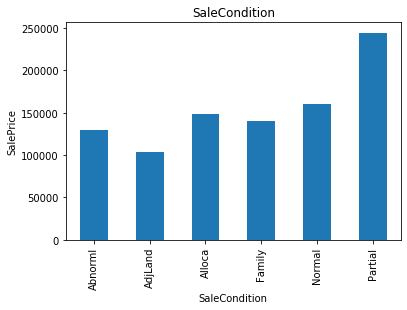

In [20]:
for feature in categorical_features:
    data=house.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Handling missing values

In [21]:
## handling Categorical features which are missing
features_nan=[feature for feature in house.columns if house[feature].isnull().sum()>1 and house[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(house[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [22]:
## Replacing missing value with a new label missing
def replace_cat_feature(house,features_nan):
    data=house.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

house=replace_cat_feature(house,features_nan)

house[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [23]:
## checking for numerical variables that contains missing values
numerical_with_nan=[feature for feature in house.columns if house[feature].isnull().sum()>1 and house[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(house[feature].isnull().mean(),2)))

LotFrontage: 0.18% missing value
MasVnrArea: 0.01% missing value
GarageYrBlt: 0.06% missing value


In [24]:

## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=house[feature].median()    
    house[feature].fillna(median_value,inplace=True)
    
house[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [25]:
## Temporal Variables (Date Time Variables)-- Converting from Year data to 'age'

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    house[feature]=house['YrSold']-house[feature]

In [26]:
house[['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YrSold  YearBuilt  YearRemodAdd  GarageYrBlt
0    2008          5             5          5.0
1    2007         31            31         31.0
2    2008          7             6          7.0
3    2006         91            36          8.0
4    2008          8             8          8.0

Now we have no of years of each of the 'YearBuilt','YearRemodAdd','GarageYrBlt with respect to the year in which it was sold.

In [27]:
house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          60       RL         65.0     8450   Pave  Missing      Reg   
1          20       RL         80.0     9600   Pave  Missing      Reg   
2          60       RL         68.0    11250   Pave  Missing      IR1   
3          70       RL         60.0     9550   Pave  Missing      IR1   
4          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7    

# Numerical Variables
Since the numerical variables are skewed and also have outliers we will perform log normal distribution to handle it

In [28]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    house[feature]=np.log(house[feature])

In [29]:
house.head()

MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

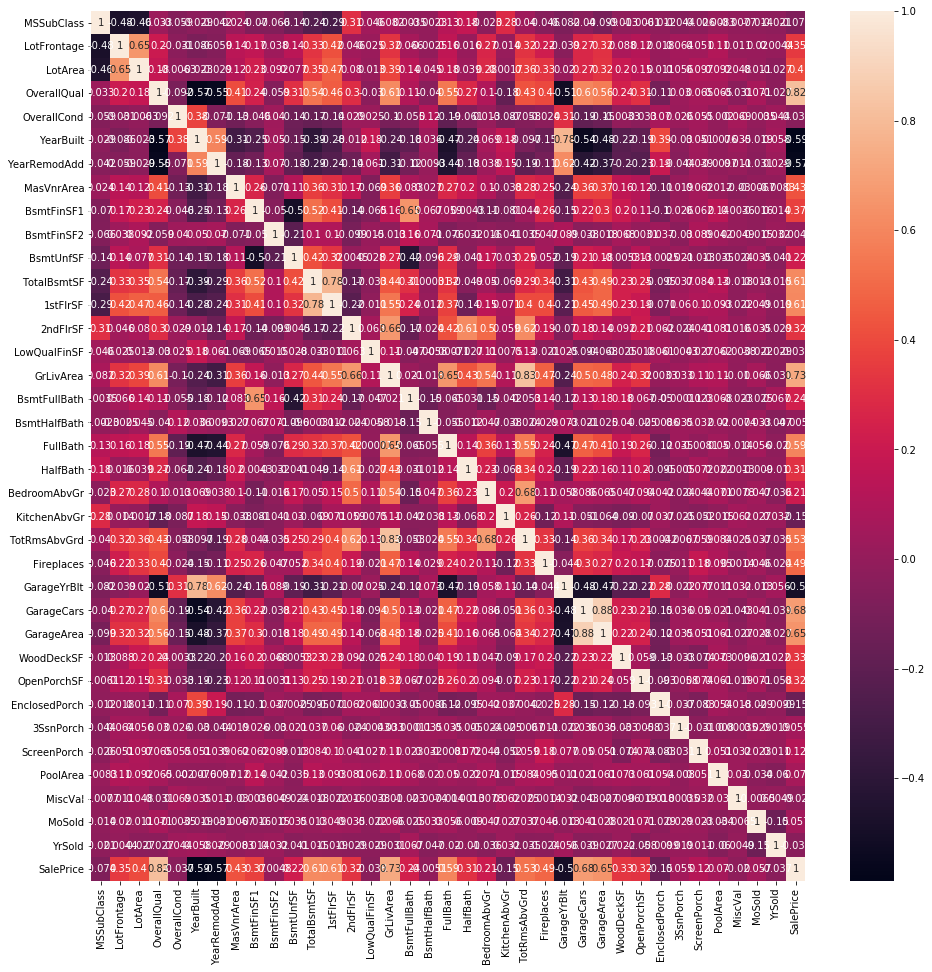

In [30]:
# Looking at Heatmap to look at coorelation between variables.
plt.figure(figsize=(16,16))
sns.heatmap(house[list(house.dtypes[house.dtypes!='object'].index)].corr(),annot=True)
plt.show()

## Categorical Variables

In [31]:
for feature in categorical_features:
    labels_ordered=house.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    house[feature]=house[feature].map(labels_ordered)

In [32]:
house.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0          60         3     4.174387  9.041922       1      2         0   
1          20         3     4.382027  9.169518       1      2         0   
2          60         3     4.219508  9.328123       1      2         1   
3          70         3     4.094345  9.164296       1      2         1   
4          60         3     4.430817  9.565214       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            15           3   
1            1          1          2          0            20           1   
2            1          1          0          0            15           3   
3            1          1          1          0            17           3   
4            1          1          2          0            24           3   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           4         3           6            7            5          5   
1           4         3           4            6            8         31   
2           4         3           6            7            5          7   
3           4         3           6            7            5         91   
4           4         3           6            8            5          8   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             5          1         2           12           13           2   
1            31          1         2            6            6           1   
2             6          1         2           12           13           2   
3            36          1         2            4            7           1   
4             8          1         2           12           13           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           5         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           5         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           5         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6         706             5           0   
1             4             4         978             5           0   
2             2             6         486             5           0   
3             1             4         216             5           0   
4             3             6         655             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        5          4           1         4.0   
1        284         1262        5          4           1         4.0   
2        434          920        5          4           1         4.0   
3        540          756        5          3           1         4.0   
4        490         1145        5          4           1         4.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.752270       854             0   7.444249             1             0   
1  7.140453         0             0   7.140453             0             1   
2  6.824374       866             0   7.487734             1             0   
3  6.867974       756             0   7.448334             1             0   
4  7.043160      1053             0   7.695303             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            1             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2             7   
4

In [33]:
pd.pandas.set_option("display.max_rows",None)
round(100*(house.isnull().sum()/len(house.index)),2)

MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea 

In [34]:
house.shape

(1460, 80)

In [35]:
# 0.07% of null values are present in 'Electrical ' Column, dropping them.
house=house.dropna()

In [36]:
house.shape

(1459, 80)

In [37]:
#Creating Dummies 
dummy_col = pd.get_dummies(house[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

Dropping columns for which dummies are created


In [38]:
house = pd.concat([house,dummy_col],axis='columns')

house = house.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

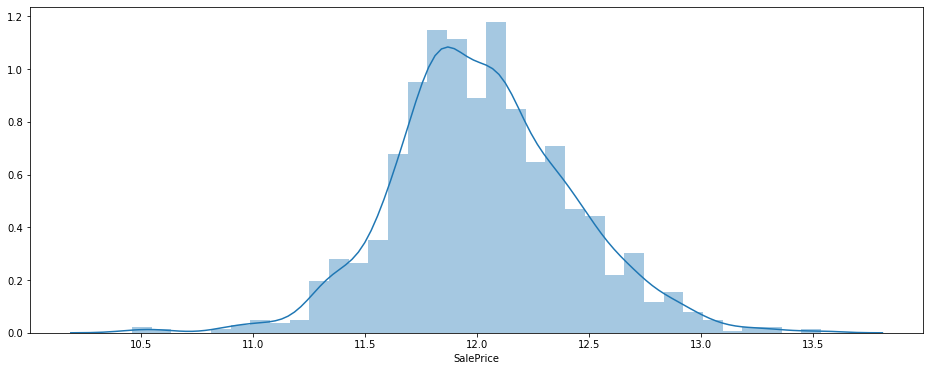

In [39]:
#Checking at distribution of Target Variable 
plt.figure(figsize=(16,6))
sns.distplot(house.SalePrice)
plt.show()

Target variable is normally distributed now

## Train and test split

In [40]:
#Creating Test and Train sets
from sklearn.model_selection import train_test_split

In [41]:
df_train,df_test = train_test_split(house,train_size=0.7,test_size=0.3,random_state=42)

## Scaling the data

In [42]:

feature_scale=[feature for feature in house.columns if feature not in ['SalePrice']]

In [43]:
#Scaling of Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_train[feature_scale] = scaler.fit_transform(df_train[feature_scale])
df_test[feature_scale] = scaler.transform(df_test[feature_scale])

In [44]:
df_train.head()

MSSubClass  LotFrontage   LotArea  Street  Alley  LotShape  Utilities  \
135     0.000000     0.495064  0.406983     1.0    1.0  0.000000        1.0   
1452    0.941176     0.189077  0.203387     1.0    1.0  0.000000        1.0   
1046    0.235294     0.517503  0.491978     1.0    1.0  0.333333        1.0   
691     0.235294     0.592175  0.549440     1.0    1.0  0.333333        1.0   
435     0.235294     0.265271  0.411944     1.0    1.0  1.000000        1.0   

      LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
135         0.0     0.666667        0.625   0.294574      0.639344   
1452        0.0     0.444444        0.500   0.007752      0.032787   
1046        0.0     0.888889        0.500   0.007752      0.016393   
691         0.0     1.000000        0.625   0.100775      0.213115   
435         0.0     0.666667        0.625   0.100775      0.229508   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
135     0.208999   0.333333       0.75      0.50      0.75          0.25   
1452    0.058055   0.333333       0.75      0.75      0.75          1.00   
1046    0.150943   0.666667       0.75      1.00      0.75          0.75   
691     0.849057   1.000000       0.75      1.00      0.75          1.00   
435     0.000000   0.666667       0.75      0.75      0.75          0.75   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
135       0.833333    0.000000      0.833333    0.000000   0.558219   
1452      1.000000    0.096917      0.833333    0.000000   0.000000   
1046      1.000000    0.042523      0.833333    0.000000   0.750000   
691       1.000000    0.257796      0.833333    0.000000   0.423373   
435       1.000000    0.068214      1.000000    0.305235   0.029966   

      TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  \
135      0.213421       0.75         1.0  0.611775  0.000000           0.0   
1452     0.089525       0.75         1.0  0.441306  0.000000           0.0   
1046     0.326023       1.00         1.0  0.675789  0.467949           0.0   
691      0.400000       1.00         1.0  0.753177  1.000000           0.0   
435      0.130769       1.00         1.0  0.343112  0.445513           0.0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
135    0.571872      0.000000           0.0  0.666667       0.0         0.375   
1452   0.412522      0.333333           0.0  0.333333       0.0         0.250   
1046   0.760644      0.000000           0.0  1.000000       0.5         0.500   
691    0.905227      0.000000           0.5  1.000000       0.5         0.500   
435    0.567428      0.333333           0.0  0.666667       0.5         0.375   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
135            0.5     0.333333      0.416667    0.333333          0.8   
1452           0.5     0.333333      0.250000    0.000000          0.2   
1046           0.5     1.000000      0.750000    0.333333          0.8   
691            0.5     1.000000      0.666667    0.666667          1.0   
435            0.5     0.666667      0.333333    0.333333          0.6   

      GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
135      0.355140      0.333333        0.50    0.373766         0.6   
1452     0.009346      1.000000        0.50    0.370240         0.6   
1046     0.009346      1.000000        0.75    0.504937         0.6   
691      0.121495      1.000000        0.75    0.586742         0.6   
435      0.121495      0.666667        0.50    0.387870         0.6   

      GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
135          1.0    0.114352     0.000000            0.0        0.0   
1452         1.0    0.000000     0.051188            0.0        0.0   
1046         1.0    0.249708     0.197441            0.0        0.0   
691          1.0    0.445741     0.091408            0.0        0.0   
435          1.0    0.184364     0.111517  

In [45]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [46]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [47]:
## Importing necessary libraries
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

## Variable selection using RFE

In [48]:
#Selecting 25 Variables for RFE
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,25)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=25, step=1, verbose=0)

In [49]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [50]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [51]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## Lasso Regression

In [52]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8721938314525824
0.8935957816865528


Train score is 0.87 and test score is 0.89

In [53]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', 10.506),
 ('LotFrontage', 0.371),
 ('LotArea', 0.0),
 ('Street', 0.537),
 ('Alley', 0.349),
 ('LotShape', -0.306),
 ('Utilities', 0.069),
 ('LandSlope', 0.201),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.227),
 ('MasVnrArea', 0.931),
 ('ExterQual', 0.168),
 ('ExterCond', 0.0),
 ('BsmtQual', -0.112),
 ('BsmtCond', 0.137),
 ('BsmtExposure', 0.027),
 ('BsmtFinType1', 0.117),
 ('BsmtFinSF1', 0.268),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.058),
 ('TotalBsmtSF', -0.0),
 ('HeatingQC', -0.0),
 ('CentralAir', 0.0)]

In [54]:
#Importing Gridsearchcv, k fold for hyperparameter 
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

## Hyperparameter tuning using cross validation

In [55]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [56]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.006595      0.001429         0.002499        0.000922        0.001   
1       0.004797      0.000871         0.001799        0.000748        0.010   
2       0.004497      0.001360         0.002098        0.000539        0.100   
3       0.004897      0.001299         0.002099        0.000831        1.000   
4       0.006396      0.001561         0.002498        0.000500        5.000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}          -0.112935          -0.101154          -0.085845   
1   {'alpha': 0.01}          -0.146514          -0.140552          -0.117817   
2    {'alpha': 0.1}          -0.321874          -0.284051          -0.301917   
3    {'alpha': 1.0}          -0.321874          -0.284051          -0.301917   
4    {'alpha': 5.0}          -0.321874          -0.284051          -0.301917   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0          -0.105132          -0.104671          -0.090643          -0.089522   
1          -0.135624          -0.156786          -0.141024          -0.128284   
2          -0.286354          -0.359167          -0.327307          -0.273483   
3          -0.286354          -0.359167          -0.327307          -0.273483   
4          -0.286354          -0.359167          -0.327307          -0.273483   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0          -0.090155          -0.083495          -0.102997        -0.096655   
1          -0.135263          -0.130002          -0.134708        -0.136657   
2          -0.288025          -0.297280          -0.306169        -0.304563   
3          -0.288025          -0.297280          -0.306169        -0.304563   
4          -0.288025          -0.297280          -0.306169        -0.304563   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.009386                1           -0.092625           -0.095017   
1        0.010063                2           -0.134365           -0.133597   
2        0.024193                3           -0.302753           -0.306636   
3        0.024193                3           -0.302753           -0.306636   
4        0.024193                3           -0.302753           -0.306636   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.095729           -0.090182           -0.093846   
1           -0.137530           -0.134226           -0.136431   
2           -0.304806           -0.306473           -0.298588   
3           -0.304806           -0.306473           -0.298588   
4           -0.304806           -0.306473           -0.298588   

   split5_train_score  split6_train_score  split7_train_score  \
0           -0.096272           -0.095647           -0.095599   
1           -0.136905           -0.135985           -0.135789   
2           -0.301949           -0.307938           -0.306173   
3           -0.301949           -0.307938           -0.306173   
4           -0.301949           -0.307938           -0.306173   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0           -0.096401           -0.094621         -0.094594         0.001832  
1           -0.137156           -0.135799         -0.135778         0.001260  
2           -0.305525           -0.304335         -0.304518         0.002622  
3           -0.305525           -0.304335         -0.304518         0.002622  
4           -0.305525           -0.304335         -0.304518         0.002622

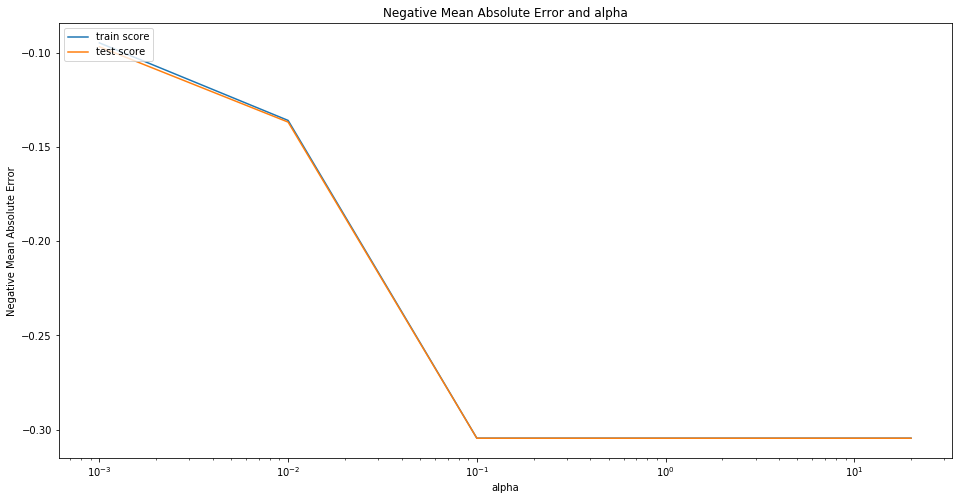

In [57]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [58]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

Best alpha value using Lasso regression is 0.001

In [59]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8721938314525824
0.8935957816865528


Models performance using best alpha
1. Train score is 0.87
2. Test score is 0.89<br/>Hence our model is able to generalise the data well on an unseen test data

In [60]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [61]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0     MSSubClass  10.505613
12    MasVnrArea   0.931220
3         Street   0.536735
1    LotFrontage   0.370863
4          Alley   0.348611
19    BsmtFinSF1   0.267762
11  YearRemodAdd   0.227087
7      LandSlope   0.200993
13     ExterQual   0.168237
16      BsmtCond   0.137288

Top five variables which are usefull in prediction the sale price are as follows:-
1. MSSubClass
2. MasVnrArea
3. Street
4. LotFrontage
5. Alley

## Ridge Regression

In [62]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8807886340281685
0.8860484793639046


Train score is 0.88
Test score is 0.88

## Hyperparameter tuning using cross validation

In [63]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [64]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.012294      0.004288         0.004397        0.001114        0.001   
1       0.013491      0.006357         0.003399        0.000800        0.010   
2       0.004398      0.000663         0.001698        0.000640        0.100   
3       0.003598      0.000490         0.001599        0.000489        0.200   
4       0.003798      0.000871         0.001899        0.000300        0.500   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}          -0.106451          -0.093440          -0.092049   
1   {'alpha': 0.01}          -0.106474          -0.093486          -0.091761   
2    {'alpha': 0.1}          -0.106657          -0.093901          -0.090184   
3    {'alpha': 0.2}          -0.106834          -0.094295          -0.089368   
4    {'alpha': 0.5}          -0.107437          -0.095282          -0.088140   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0          -0.109612          -0.105630          -0.082313          -0.107035   
1          -0.109569          -0.105550          -0.082312          -0.104470   
2          -0.109258          -0.104803          -0.082479          -0.094418   
3          -0.109063          -0.104153          -0.082766          -0.091272   
4          -0.108804          -0.103138          -0.083617          -0.088300   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0          -0.091271          -0.079798          -0.102753        -0.097035   
1          -0.091236          -0.079779          -0.102735        -0.096737   
2          -0.090946          -0.079616          -0.102577        -0.095484   
3          -0.090757          -0.079610          -0.102478        -0.095060   
4          -0.090764          -0.079785          -0.102564        -0.094783   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.010190                7           -0.088852           -0.091467   
1        0.009971                6           -0.088856           -0.091468   
2        0.009618                5           -0.088900           -0.091500   
3        0.009634                4           -0.088958           -0.091567   
4        0.009691                1           -0.089303           -0.091849   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.091811           -0.085126           -0.090350   
1           -0.091808           -0.085148           -0.090346   
2           -0.091827           -0.085353           -0.090336   
3           -0.091909           -0.085595           -0.090379   
4           -0.092284           -0.086340           -0.090690   

   split5_train_score  split6_train_score  split7_train_score  \
0           -0.092644           -0.088162           -0.091704   
1           -0.092646           -0.088343           -0.091701   
2           -0.092671           -0.089824           -0.091677   
3           -0.092715           -0.090637           -0.091698   
4           -0.093054           -0.091721           -0.091954   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0           -0.092778           -0.090168         -0.090306         0.002252  
1           -0.092786           -0.090172         -0.090327         0.002231  
2           -0.092864           -0.090231         -0.090518         0.002099  
3           -0.092973           -0.090318         -0.090675         0.002044  
4           -0.093386           -0.090684         -0.091126         0.001958

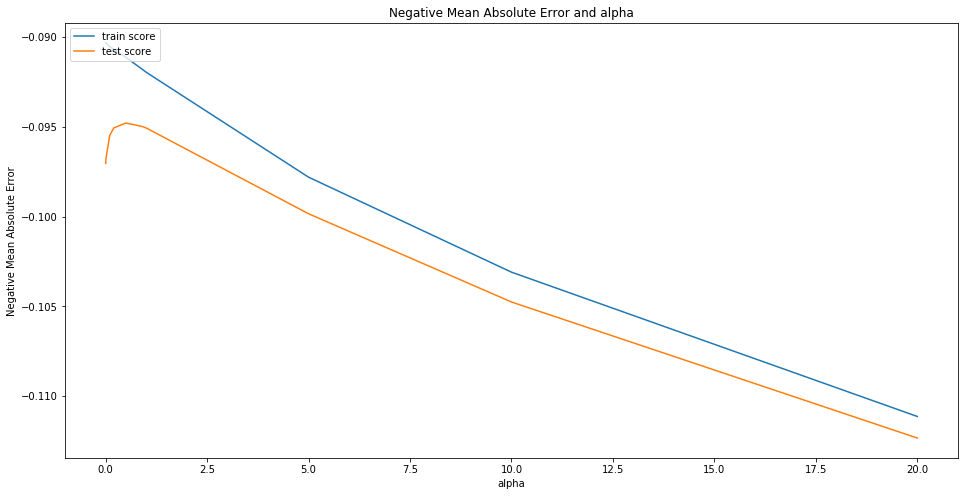

In [65]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [66]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.5}

Best alpha value after cross validation is 0.5

## Model's performance using the best alpha

In [67]:
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8800343460001494
0.8867641462176665


Train score is 0.88
Test score is 0.886 which is almost same as train score

In [68]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [69]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure       Coef
0     MSSubClass  10.225253
12    MasVnrArea   0.856145
3         Street   0.501702
1    LotFrontage   0.415534
4          Alley   0.388974
11  YearRemodAdd   0.315894
19    BsmtFinSF1   0.236091
17  BsmtExposure   0.199723
2        LotArea   0.194209
9    OverallCond   0.192105

Top five variables which are usefull in prediction the sale price are as follows:-
1. MSSubClass
2. MasVnrArea
3. Street
4. LotFrontage
5. Alley

In [70]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8721938314525824
0.8935957816865528


We notice that Lasso has performed marginaly better than Ridge on test data, hence we go ahead with Lasso Model.
Top five variables are same for both Ridge and Lasso regression for predicting the sale price of the house.
1. MSSubClass
2. MasVnrArea
3. Street
4. LotFrontage
5. Alley
